**Краткое описание задачи**

Цель исследования — выявить ключевые факторы и узкие места в системе авиаперевозок, способствующие задержкам рейсов, и предоставить аналитическую основу для принятия обоснованных управленческих решений, направленных на повышение пунктуальности и надёжности авиасообщения.

In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('data/flights.csv', low_memory = False)
df.head()


,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,...,408.0,-22.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,...,741.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
2,2015,1,1,4,US,840,N171US,SFO,CLT,20,...,811.0,5.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,20,...,756.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,2015,1,1,4,AS,135,N527AS,SEA,ANC,25,...,259.0,-21.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


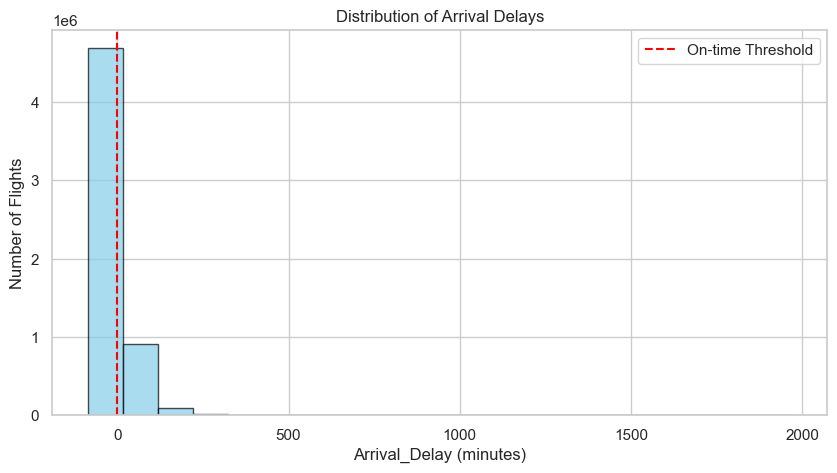

In [38]:
plt.figure(figsize=(10, 5))
plt.hist(df["ARRIVAL_DELAY"], bins=20, color="skyblue", edgecolor='black', alpha=0.7)
plt.axvline(0, color="red", linestyle="--", label="On-time Threshold")
plt.title("Distribution of Arrival Delays")
plt.xlabel("Arrival_Delay (minutes)")
plt.ylabel("Number of Flights")
plt.legend()
plt.show()

Краткий вывод по графику:

Большинство рейсов прибывают вовремя или с небольшой задержкой.  
- Пик гистограммы — слева от нуля, что означает: много рейсов прибывает раньше времени (отрицательные задержки).  
- Справа от красной линии (x=0) — количество задержанных рейсов резко падает, но есть длинный хвост вправо — это редкие, но очень большие задержки (до 2000+ минут).  
- Распределение сильно смещено вправо — типично для данных о задержках: большинство полётов идут по расписанию, а серьёзные опоздания — редкость, но они бывают.

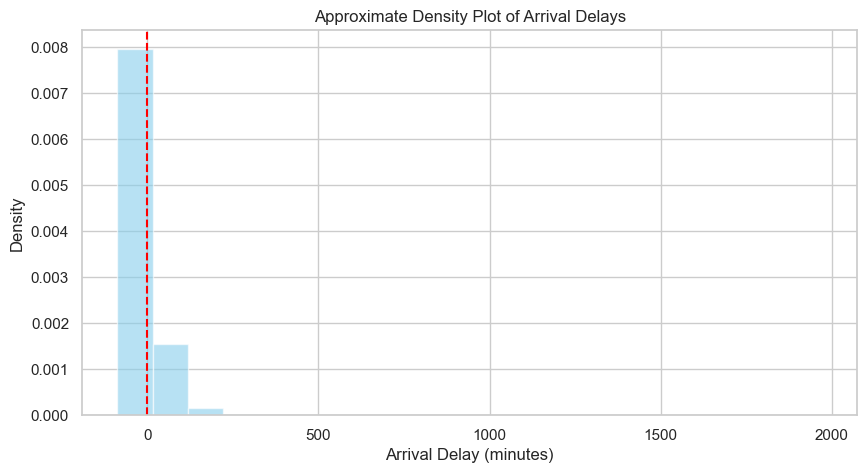

In [41]:
if "ARRIVAL_DELAY" in df.columns:
    data = df["ARRIVAL_DELAY"].dropna().values
    
    plt.figure(figsize=(10, 5))
    plt.hist(data, bins=20, density=True, color="skyblue", alpha=0.6)
    plt.axvline(0, color="red", linestyle="--")
    plt.title("Approximate Density Plot of Arrival Delays")
    plt.xlabel("Arrival Delay (minutes)")
    plt.ylabel("Density")
    plt.show()

### Краткий вывод по графику:

Распределение задержек прибытия сильно скошено вправо.  
- Пик плотности — слева от нуля, что означает: наиболее вероятно, что рейс прибывает вовремя или даже раньше.  
- Справа от нуля — плотность быстро падает, но хвост распределения тянется далеко (до 2000+ минут), показывая, что крайне большие задержки возможны, хотя и редки.  
- График подтверждает: большинство рейсов не задерживаются, но система должна быть готова к редким, но серьёзным сбоям.


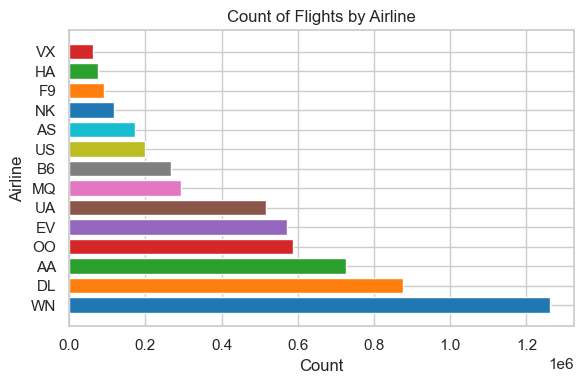

In [42]:
airline_counts = df['AIRLINE'].value_counts().sort_values(ascending=False)
colors = plt.cm.tab10.colors
colors = [colors[i % len(colors)] for i in range(len(airline_counts))]

plt.figure(figsize=(6, 4))
plt.barh(airline_counts.index, airline_counts.values, color=colors)
plt.title("Count of Flights by Airline")
plt.xlabel("Count")
plt.ylabel("Airline")
plt.tight_layout()
plt.show()

Краткий вывод по графику:

На графике показано количество рейсов по авиакомпаниям.  
- Самая загруженная авиакомпания — WN (Southwest Airlines), у неё наибольшее число рейсов.  
- За ней следуют DL (Delta) и AA (American Airlines).  
- Меньше всего рейсов у VX (Virgin America) и HA (Hawaiian Airlines).  
- Распределение неравномерное: несколько крупных перевозчиков доминируют, остальные работают в меньших объёмах.

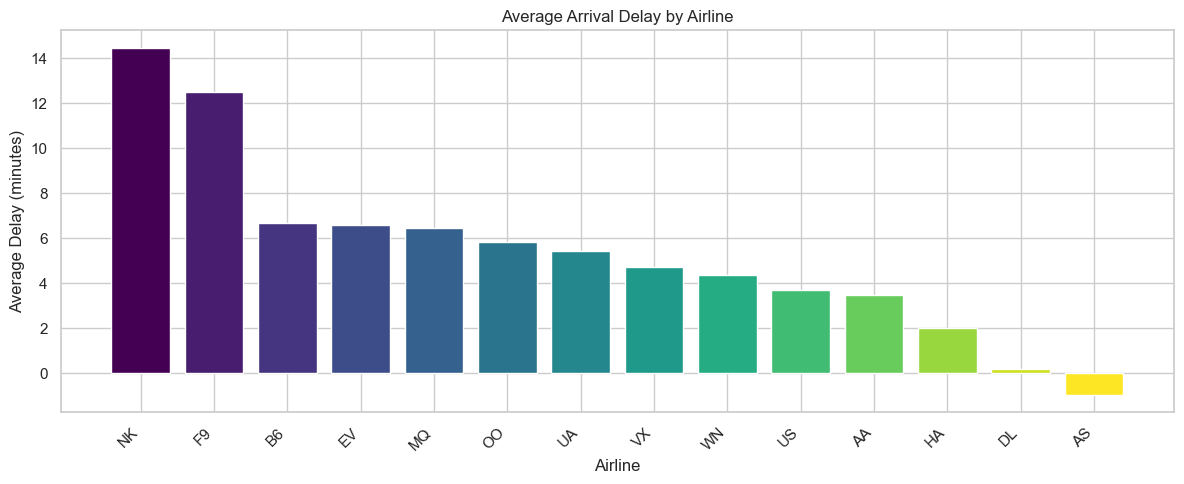

In [43]:
if "AIRLINE" in df.columns and "ARRIVAL_DELAY" in df.columns:
    airline_delay = df.groupby("AIRLINE")["ARRIVAL_DELAY"].mean().sort_values(ascending=False)
    
    plt.figure(figsize=(12, 5))
    colors = plt.cm.viridis(np.linspace(0, 1, len(airline_delay)))
    
    plt.bar(airline_delay.index, airline_delay.values, color=colors)
    plt.title("Average Arrival Delay by Airline")
    plt.xlabel("Airline")
    plt.ylabel("Average Delay (minutes)")
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

Краткий вывод по графику:

График показывает среднюю задержку прибытия по авиакомпаниям.  
- Наибольшую среднюю задержку имеет авиакомпания NK (Spirit Airlines) — более 14 минут.  
- Второе место у F9 (Frontier Airlines) — около 12.5 минут.  
- Самая низкая задержка — у AS (Alaska Airlines), почти на уровне 0 минут.  
- Задержки у большинства компаний находятся в диапазоне от 3 до 7 минут, что говорит о стабильности работы большинства перевозчиков.  
- Есть явный разброс: одни компании систематически опаздывают, другие — пунктуальны.


Между количеством рейсов и средней задержкой нет прямой связи. Крупнейшая авиакомпания (WN) работает достаточно пунктуально, в то время как менее загруженные перевозчики, такие как NK и F9, демонстрируют самые высокие задержки. Наиболее пунктуальная авиакомпания — AS — не входит в число лидеров по объёму рейсов. Это показывает, что масштаб операций не определяет надёжность: некоторые небольшие перевозчики справляются лучше крупных.

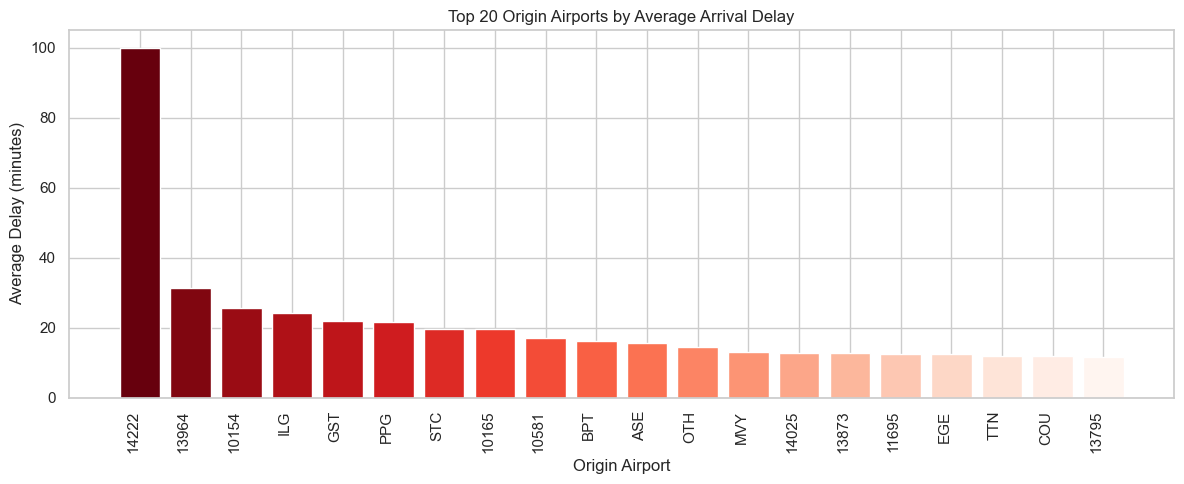

In [44]:
if "ORIGIN_AIRPORT" in df.columns and "ARRIVAL_DELAY" in df.columns:
    origin_delay = (
        df.groupby("ORIGIN_AIRPORT")["ARRIVAL_DELAY"]
        .mean()
        .sort_values(ascending=False)
        .head(20)
    )
    colors = plt.cm.Reds_r(np.linspace(0, 1, len(origin_delay)))
    
    plt.figure(figsize=(12, 5))
    plt.bar(origin_delay.index, origin_delay.values, color=colors)
    plt.title("Top 20 Origin Airports by Average Arrival Delay")
    plt.xlabel("Origin Airport")
    plt.ylabel("Average Delay (minutes)")
    plt.xticks(rotation=90, ha='right')
    plt.tight_layout()
    plt.show()

Краткий вывод по графику:

График показывает топ-20 аэропортов вылета с наибольшей средней задержкой прибытия рейсов.  
- Лидер — аэропорт с кодом 14222 (более 100 минут задержки в среднем).  
- Следующие — 13964 и 10154, с задержками около 30 минут.  
- Остальные аэропорты в списке — от 20 до 15 минут задержки.  
- Разброс значительный: от сверхвысоких задержек у лидеров до умеренных у остальных.


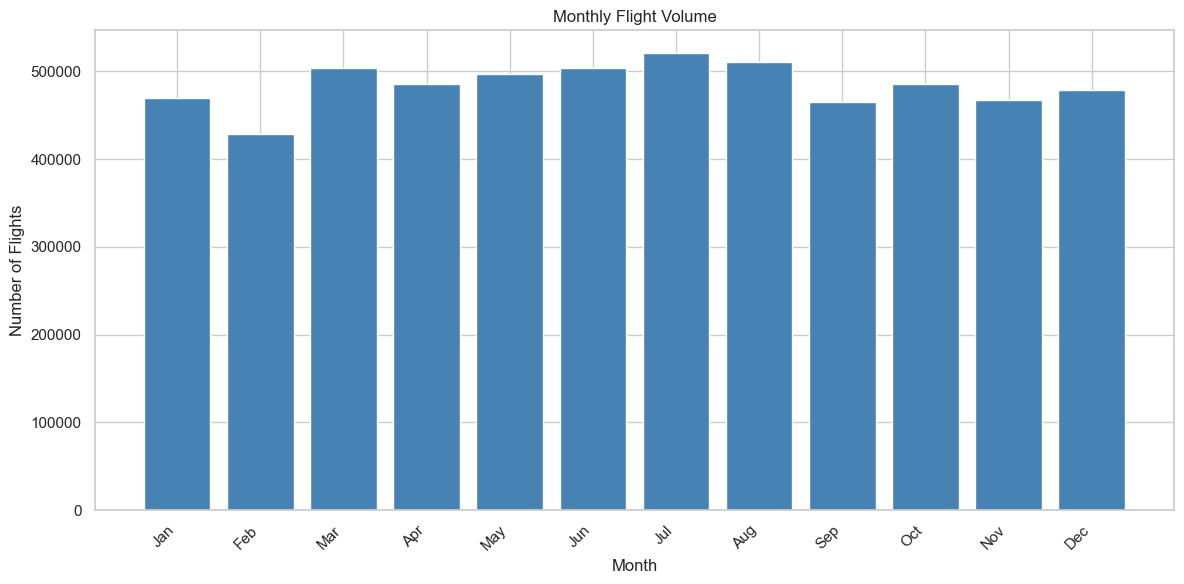

In [45]:
monthly_flights = df.groupby('MONTH').size().reset_index(name='Flight_Count')
monthly_flights['Month_Name'] = monthly_flights['MONTH'].map({
    1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun',
    7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'
})

month_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
               'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
monthly_flights['Month_Name'] = pd.Categorical(
    monthly_flights['Month_Name'], categories=month_order, ordered=True
)
monthly_flights = monthly_flights.sort_values('Month_Name')

plt.figure(figsize=(12, 6))
plt.bar(monthly_flights['Month_Name'], monthly_flights['Flight_Count'], color='steelblue')
plt.title('Monthly Flight Volume')
plt.xlabel('Month')
plt.ylabel('Number of Flights')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Краткий вывод по графику:

График показывает количество рейсов по месяцам.  
- Наибольшее число рейсов — в июле (более 500 тыс.), что соответствует пиковому сезону летних путешествий.  
- Минимальный объем — в феврале (около 420 тыс.), вероятно, из-за низкого спроса и коротких дней.  
- В остальные месяцы объем колеблется в пределах 470–510 тыс., с заметным ростом весной и осенью.

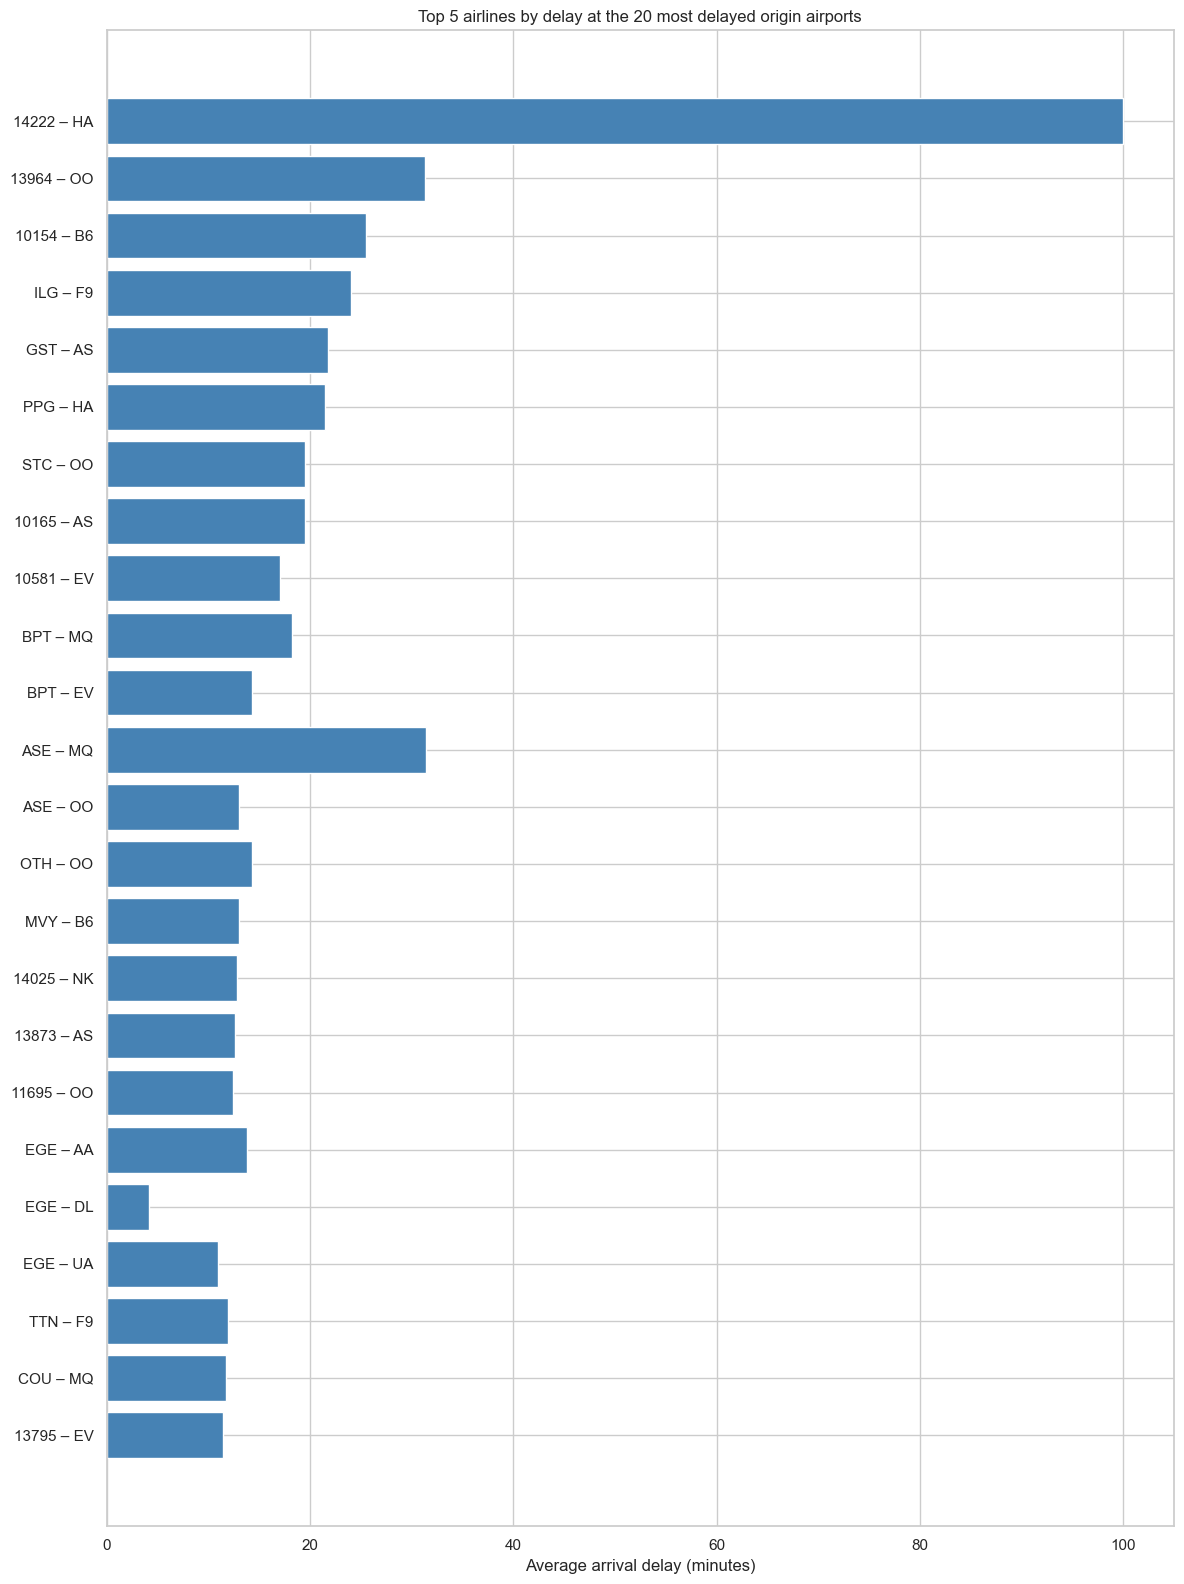

In [54]:
top_airports = (
    df.groupby('ORIGIN_AIRPORT')['ARRIVAL_DELAY']
    .mean()
    .sort_values(ascending=False)
    .head(20)
    .index
)

filtered = df[df['ORIGIN_AIRPORT'].isin(top_airports)]

delay_by_pair = (
    filtered.groupby(['ORIGIN_AIRPORT', 'AIRLINE'])['ARRIVAL_DELAY']
    .mean()
    .reset_index()
)

top_airlines_per_airport = (
    delay_by_pair
    .sort_values('ARRIVAL_DELAY', ascending=False)
    .groupby('ORIGIN_AIRPORT')
    .head(5)
)

airport_order = {airport: i for i, airport in enumerate(top_airports)}
top_airlines_per_airport['airport_rank'] = top_airlines_per_airport['ORIGIN_AIRPORT'].map(airport_order)
top_airlines_per_airport = top_airlines_per_airport.sort_values('airport_rank')

y_labels = [
    f"{row['ORIGIN_AIRPORT']} – {row['AIRLINE']}"
    for _, row in top_airlines_per_airport.iterrows()
]
x_values = top_airlines_per_airport['ARRIVAL_DELAY'].values

plt.figure(figsize=(12, 16))
plt.barh(y_labels, x_values, color='steelblue')
plt.xlabel('Average arrival delay (minutes)')
plt.title('Top 5 airlines by delay at the 20 most delayed origin airports')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

График показывает топ-5 авиакомпаний по средней задержке прибытия в каждом из 20 аэропортов с наибольшими задержками.  
- Сочетание «14222 – HA» демонстрирует самую высокую среднюю задержку — значительно превышающую остальные, что указывает на серьёзные проблемы именно у этой пары аэропорт–авиакомпания.  
- Другие заметные пары с большими задержками: «13964 – OO», «10154 – B6» и «ILG – F9».  
- Некоторые авиакомпании (например, OO, EV, MQ) встречаются в нескольких аэропортах, что может свидетельствовать о системных проблемах с пунктуальностью у этих перевозчиков.  
- Даже в пределах одного аэропорта задержки сильно различаются в зависимости от авиакомпании — значит, выбор перевозчика влияет на вероятность опоздания.


**ВЫВОДЫ**
Анализ показывает, что задержки рейсов зависят в первую очередь от конкретных аэропортов и авиакомпаний, а не от общего объёма перевозок или времени года.

Самые высокие задержки наблюдаются в отдельных аэропортах — например, аэропорт с кодом 14222 выделяется средней задержкой более 100 минут, что значительно выше остальных. При этом даже в одном аэропорту разные авиакомпании показывают разную пунктуальность: например, HA в аэропорту 14222 сильно отстаёт от других перевозчиков. Некоторые авиакомпании (OO, EV, MQ, F9) часто встречаются среди лидеров по задержкам в разных аэропортах, что может указывать на проблемы в их внутренних процессах.

При этом крупнейшая авиакомпания WN работает достаточно пунктуально, а AS — одна из самых надёжных, несмотря на меньший объём рейсов.

Сезонность влияет на число рейсов (максимум летом), но не на уровень задержек — система справляется с пиковой нагрузкой. Зато зимой, несмотря на меньшее число рейсов, задержки остаются заметными, возможно из-за погоды или плотного расписания.

Также распределение задержек сильно скошено: большинство рейсов прибывают вовремя, но есть редкие, но очень большие задержки (до 2000+ минут), которые сильно влияют на пассажиров.

Рекомендации:
- Уделить особое внимание работе в топ-5 проблемных аэропортах.
- Анализировать и сравнивать пунктуальность авиакомпаний внутри каждого аэропорта.
- Изучить практики самых пунктуальных перевозчиков (AS, WN) для внедрения лучших решений.
- Ввести простой мониторинг экстремальных задержек, чтобы быстрее реагировать на сбои.